In [1]:
from PySections import *
estructura = Estructura()

area = 3.54/1550
inercia = 53.8/(1550**2)

h = 4
l = 4
dl = 1

desplazamientosLibres=[55.3/1000,-15.1/1000,-0.00826,55.4/1000,-15.6/1000,-0.00829,0,0,0,0,0,0]

acero = Material('Acero', 200000000, 0.2, 9.9*10**-6, 23.54)
seccion = Seccion('Elementos', TipoSeccion.GENERAL, [area,inercia], acero)

estructura.agregarNodo(x=dl,y=h)
estructura.agregarNodo(x=l+dl,y=h)
estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=l,y=0,fix=[False,False,False])

estructura.agregarElemento(nodoInicial=2,nodoFinal=0,seccion=seccion,defCortante=False)
estructura.agregarElemento(nodoInicial=0,nodoFinal=1,seccion=seccion,defCortante=False)
estructura.agregarElemento(nodoInicial=3,nodoFinal=1,seccion=seccion,defCortante=False)

estructura.agregarCargaNodo(nodo=0,py=-120)
estructura.agregarCargaNodo(nodo=1,py=-120)

estructura.solucionar(True,True)

Se ha terminado de calcular, puedes examinar la variable de la estructura para consultar los resultados.


In [24]:
estructura.solucionar(analisis='CR')

array([[ 0.05529981],
       [-0.01505167],
       [-0.00825451],
       [ 0.05536322],
       [-0.01559654],
       [-0.00829264]])

In [10]:
def guardarCSV(arreglo,nombre):
    import os
    path = os.getcwd()
    np.savetxt(path + "/"+nombre+".csv", arreglo, delimiter=",")

In [23]:
for i in estructura.elementos:
    i.Ue = np.array(desplazamientosLibres)[np.ix_(i.diccionario)]
i = estructura.elementos[0]
i.determinarV0()
i.calcularv()
i.fuerzasBasicas()
[Ke, P] = i.matrizYFuerzas()
try:
    guardarCSV(i.kb,'Kb')
    guardarCSV(i.kb0,'Kb0')
    guardarCSV(Ke,'Ke')
    guardarCSV(P,'Pl')
except:
    print('error')
i.psi

error


0.5938065354437346

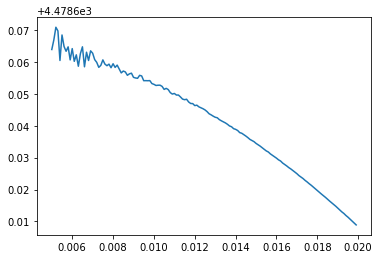

In [13]:
import matplotlib.pyplot as plt
kb1 = lambda psi,E,I,L: ((E*I)/(L))*((psi*(np.sin(psi)-psi*np.cos(psi)))/(2-2*np.cos(psi)-psi*np.sin(psi)))
x = np.arange(0.005,0.02,0.0001)
plt.plot(x,kb1(x,estructura.elementos[1].E,estructura.elementos[1].Inercia,estructura.elementos[1].Longitud))